In [1]:
import numpy as np

In [2]:
def f_eval(x):
    v = 10.0
    L = 0.01
    R = 0.1
    i_l = x
    f =  1.0/L*(v - R*i_l)
    return f


x = 0.0
f_eval(x)


1000.0

In [9]:
def solver():
    x_0 = 0.0
    Dt = 1.0e-4
    N_steps = 10000
    T = np.zeros(N_steps)
    X = np.zeros(N_steps)
    
    t = 0.0
    x = x_0
    T[0] = t
    X[0] = x
    for it in range(N_steps-1):
        t += Dt
        x = x + Dt * f_eval(x)
        T[it+1] = t
        X[it+1] = x
        
    return T,X
        

In [10]:
%timeit T,X = solver()
T,X = solver()

3.45 ms ± 28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Output plot

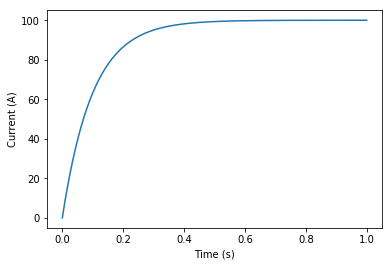

In [11]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#plt.style.use('')

fig, (ax0) = plt.subplots(nrows=1)   # creates a figure with one axe
ax0.plot(T,X)

ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Current (A)')
plt.show()

In [12]:
def solver_trapz():
    x_0 = 0.0
    Dt = 10.0e-3
    N_steps = 100
    T = np.zeros(N_steps)
    X = np.zeros(N_steps)
    
    t = 0.0
    x = x_0
    T[0] = t
    X[0] = x
    for it in range(N_steps-1):
        t += Dt
        x_1 = x + Dt * f_eval(x)
        x = x + 0.5*Dt*(f_eval(x) + f_eval(x_1))
        T[it+1] = t
        X[it+1] = x
        
    return T,X

In [13]:
#%timeit T_trapz,X_trapz = solver_trapz()
T_trapz,X_trapz = solver_trapz()

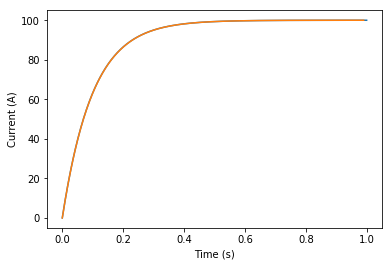

In [14]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#plt.style.use('')

fig, (ax0) = plt.subplots(nrows=1)   # creates a figure with one axe
ax0.plot(T,X)
ax0.plot(T_trapz,X_trapz)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Current (A)')
plt.show()